In [447]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

## Making dataset

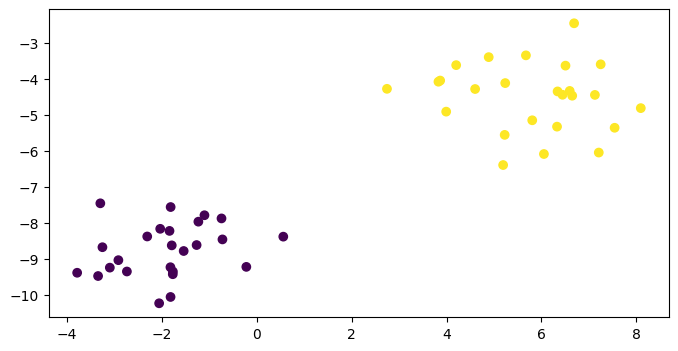

In [448]:
X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [470]:
class SVM:
    def __init__(self, lr=0.001, lambda_param=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.lambda_param = lambda_param
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # the length of weight vector is same as the number of features w.X + b (the equation of hyperplane)
        self.w = np.zeros(n_features) 
        self.b = 0

        for _ in range(self.n_iters):
            for idx, sample in enumerate(X):
                prediction = y[idx] * (np.dot(self.w, sample.T) - self.b)

                # J = (1/2)||w||^2 - (1/n)sum(max(0, 0, 1 - y_i * (w.x + b)))
                if prediction >= 1: # the hinge loss is 0 (loss = max(0, 1 - y_i * (w.x + b)))
                    self.w -= self.lr * self.lambda_param * self.w
                else:
                    self.w -= self.lr * (self.lambda_param * self.w -
                               (1 / n_samples) * np.dot(sample, y[idx]))
                    self.b +=  self.b * (1 / n_samples) * y[idx]


    def predict(self, X):
        y_pred = np.dot(self.w, X.T) + self.b
        return np.sign(y_pred)

In [471]:
clf = SVM(n_iters=2000, lr=0.001, lambda_param=0.01)
clf.fit(X, y)

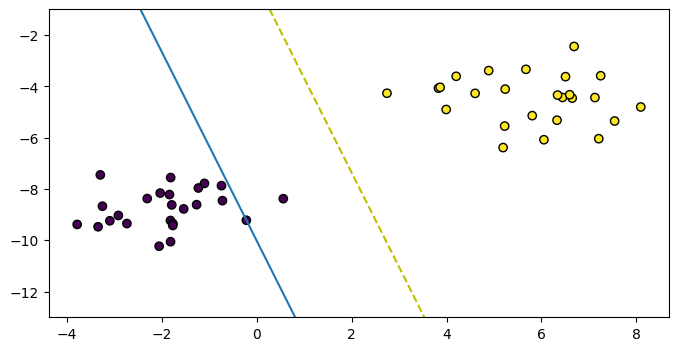

In [473]:
def get_hyperplane_value(x, w, b, offset=0):
    return -(w[0] * x + b + offset) / w[1]

x_min = np.amin(X[:, 0])
x_max = np.amax(X[:, 0])
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')

h_min = get_hyperplane_value(x_min, clf.w, clf.b)
h_max = get_hyperplane_value(x_max, clf.w, clf.b)

h_min_1 = get_hyperplane_value(x_min, clf.w, clf.b, 1)
h_max_1 = get_hyperplane_value(x_max, clf.w, clf.b, 1)

plt.plot([x_min, x_max], [h_min, h_max], "y--")
plt.plot([x_min, x_max], [h_min_1, h_max_1])
plt.ylim([-13, -1])

plt.show()